Title: Popular Classification Algorithms


Decision Trees


Task 1: Predict the loan default risk based on borrower characteristics.

Simulated loan application dataset with default outcome:
   credit_score  debt_to_income  loan_amount  annual_income  loan_default
0           602        0.368457        31698          50609             1
1           770        0.243459        20781         144074             1
2           606        0.201665        18051          46478             0
3           571        0.218116        44649         130978             1
4           688        0.229020        11949          69666             1

Loan Default Risk Prediction based on Borrower Characteristics:
Accuracy on the test set: 0.6556

Classification Report:
              precision    recall  f1-score   support

  No Default       0.53      0.55      0.54        33
     Default       0.73      0.72      0.73        57

    accuracy                           0.66        90
   macro avg       0.63      0.63      0.63        90
weighted avg       0.66      0.66      0.66        90


Confusion Matrix:
[[18 15]
 [16 41]]


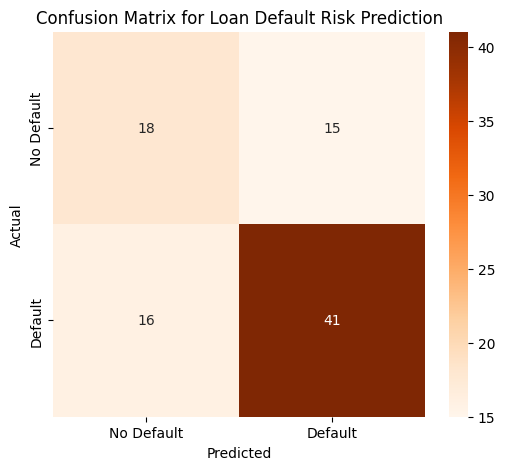


Predictions for new loan applicants:
Credit Score: 680, DTI: 0.25, Loan Amount: 20000, Income: 60000, Predicted Default: Yes, Probability: 54.26%
Credit Score: 550, DTI: 0.45, Loan Amount: 15000, Income: 40000, Predicted Default: Yes, Probability: 93.54%
Credit Score: 720, DTI: 0.15, Loan Amount: 30000, Income: 90000, Predicted Default: No, Probability: 35.08%


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate a loan application dataset with a default outcome
np.random.seed(42)
n_borrowers = 300
credit_score = np.random.randint(500, 800, n_borrowers)
debt_to_income = np.random.uniform(0.1, 0.5, n_borrowers)
loan_amount = np.random.randint(5000, 50000, n_borrowers)
annual_income = np.random.randint(30000, 150000, n_borrowers)

# Simulate default risk based on characteristics
# Lower credit score, higher DTI, higher loan amount relative to income increase default risk
default_probability = 1 / (1 + np.exp(-(0.01 * (650 - credit_score) + 5 * debt_to_income + 0.00005 * loan_amount - 0.00001 * annual_income - 1)))
loan_default = np.random.binomial(1, default_probability)

data = pd.DataFrame({
    'credit_score': credit_score,
    'debt_to_income': debt_to_income,
    'loan_amount': loan_amount,
    'annual_income': annual_income,
    'loan_default': loan_default  # 1 for default, 0 for no default
})

print("Simulated loan application dataset with default outcome:")
print(data.head())

# Separate features (X) and target (y)
X = data[['credit_score', 'debt_to_income', 'loan_amount', 'annual_income']]
y = data['loan_default']

# Scale the features to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train a Logistic Regression model (suitable for binary classification)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict loan default on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Default', 'Default'])
confusion = confusion_matrix(y_test, y_pred)

print("\nLoan Default Risk Prediction based on Borrower Characteristics:")
print(f"Accuracy on the test set: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(confusion)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Loan Default Risk Prediction')
plt.show()

# Example of predicting default risk for new loan applicants
new_applicants = pd.DataFrame({
    'credit_score': [680, 550, 720],
    'debt_to_income': [0.25, 0.45, 0.15],
    'loan_amount': [20000, 15000, 30000],
    'annual_income': [60000, 40000, 90000]
})

# Scale the new applicant data using the same scaler fitted on the training data
new_applicants_scaled = scaler.transform(new_applicants)
default_prediction = model.predict(new_applicants_scaled)
default_probability = model.predict_proba(new_applicants_scaled)[:, 1]

print("\nPredictions for new loan applicants:")
for i in range(len(new_applicants)):
    print(f"Credit Score: {new_applicants['credit_score'][i]}, DTI: {new_applicants['debt_to_income'][i]:.2f}, Loan Amount: {new_applicants['loan_amount'][i]}, Income: {new_applicants['annual_income'][i]}, Predicted Default: {'Yes' if default_prediction[i] == 1 else 'No'}, Probability: {default_probability[i]:.2%}")

Task 2: Determine if a patient should be tested for a disease based on symptoms.

Simulated patient symptom data and 'test needed' outcome:
   fever  cough  fatigue  sore_throat  test_needed
0      0      0        1            0            0
1      1      0        0            1            1
2      1      1        0            0            0
3      0      0        1            0            1
4      0      0        1            0            1

Prediction of 'Test Needed' based on Symptoms:
Accuracy on the test set: 0.5867

Classification Report:
              precision    recall  f1-score   support

     No Test       0.59      0.58      0.59        38
 Test Needed       0.58      0.59      0.59        37

    accuracy                           0.59        75
   macro avg       0.59      0.59      0.59        75
weighted avg       0.59      0.59      0.59        75


Confusion Matrix:
[[22 16]
 [15 22]]


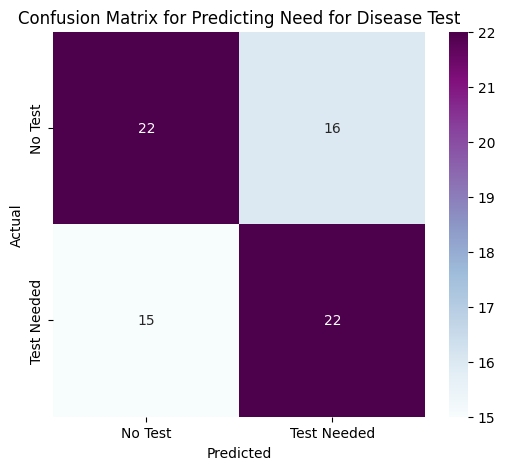


Predictions for new patients:
Patient 1: Fever=1, Cough=1, Fatigue=0, Sore Throat=0, Predicted Test Needed: Yes, Probability: 57.10%
Patient 2: Fever=0, Cough=1, Fatigue=1, Sore Throat=0, Predicted Test Needed: Yes, Probability: 50.16%
Patient 3: Fever=1, Cough=0, Fatigue=1, Sore Throat=1, Predicted Test Needed: Yes, Probability: 60.41%


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate patient symptom data and a 'test needed' outcome
np.random.seed(42)
n_patients = 250
fever = np.random.binomial(1, 0.3, n_patients)  # 30% chance of fever
cough = np.random.binomial(1, 0.5, n_patients)  # 50% chance of cough
fatigue = np.random.binomial(1, 0.4, n_patients) # 40% chance of fatigue
sore_throat = np.random.binomial(1, 0.2, n_patients) # 20% chance of sore throat

# Simulate 'test needed' based on the presence of multiple symptoms
# Patients with more symptoms are more likely to need testing
risk_probability = 1 / (1 + np.exp(-(-1 + 0.8 * fever + 0.6 * cough + 0.5 * fatigue + 0.7 * sore_throat)))
test_needed = np.random.binomial(1, risk_probability)

data = pd.DataFrame({
    'fever': fever,
    'cough': cough,
    'fatigue': fatigue,
    'sore_throat': sore_throat,
    'test_needed': test_needed  # 1 for test needed, 0 for no test needed
})

print("Simulated patient symptom data and 'test needed' outcome:")
print(data.head())

# Separate features (X) and target (y)
X = data[['fever', 'cough', 'fatigue', 'sore_throat']]
y = data['test_needed']

# Scale the features (binary features don't strictly *need* scaling for Logistic Regression,
# but it's good practice and can be beneficial for other models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train a Logistic Regression model (suitable for binary classification)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predict if a test is needed for patients in the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['No Test', 'Test Needed'])
confusion = confusion_matrix(y_test, y_pred)

print("\nPrediction of 'Test Needed' based on Symptoms:")
print(f"Accuracy on the test set: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(confusion)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='BuPu',
            xticklabels=['No Test', 'Test Needed'], yticklabels=['No Test', 'Test Needed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Predicting Need for Disease Test')
plt.show()

# Example of predicting if a test is needed for new patients
new_patients = pd.DataFrame({
    'fever': [1, 0, 1],
    'cough': [1, 1, 0],
    'fatigue': [0, 1, 1],
    'sore_throat': [0, 0, 1]
})

# Scale the new patient data using the same scaler fitted on the training data
new_patients_scaled = scaler.transform(new_patients)
test_prediction = model.predict(new_patients_scaled)
test_probability = model.predict_proba(new_patients_scaled)[:, 1]

print("\nPredictions for new patients:")
for i in range(len(new_patients)):
    print(f"Patient {i+1}: Fever={new_patients['fever'][i]}, Cough={new_patients['cough'][i]}, Fatigue={new_patients['fatigue'][i]}, Sore Throat={new_patients['sore_throat'][i]}, Predicted Test Needed: {'Yes' if test_prediction[i] == 1 else 'No'}, Probability: {test_probability[i]:.2%}")

Task 3: Classify types of animals based on features like size, habitat, and diet.

Simulated animal classification dataset:
     size    habitat         diet animal_type
0   small     forest    herbivore      mammal
1   large      ocean    carnivore        fish
2  medium  grassland     omnivore        bird
3   small     forest  insectivore      insect
4   large      ocean    carnivore      mammal

Encoded features:
   size  habitat  diet
0     2        1     1
1     0        3     0
2     1        2     3
3     2        1     2
4     0        3     0

Encoded target:
  animal_type  animal_type_encoded
0      mammal                    3
1        fish                    1
2        bird                    0
3      insect                    2
4      mammal                    3

Training the Logistic Regression model...

Animal Type Classification based on Features:
Accuracy on the test set: 1.0000

Classification Report:
              precision    recall  f1-score   support

        bird       1.00      1.00      1.00         1
        fish       1.00      1.00      1.00

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


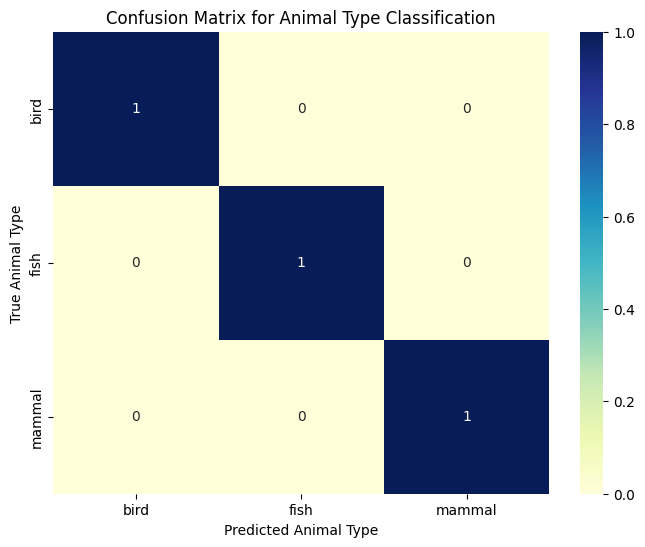


Predictions for new animals:
Size: medium, Habitat: forest, Diet: omnivore, Predicted Type: bird
Size: large, Habitat: ocean, Diet: carnivore, Predicted Type: fish
Size: small, Habitat: grassland, Diet: insectivore, Predicted Type: insect


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate an animal classification dataset
data = {
    'size': ['small', 'large', 'medium', 'small', 'large', 'medium', 'small', 'large', 'medium', 'small'],
    'habitat': ['forest', 'ocean', 'grassland', 'forest', 'ocean', 'grassland', 'forest', 'ocean', 'grassland', 'aquatic'],
    'diet': ['herbivore', 'carnivore', 'omnivore', 'insectivore', 'carnivore', 'herbivore', 'insectivore', 'carnivore', 'omnivore', 'carnivore'],
    'animal_type': ['mammal', 'fish', 'bird', 'insect', 'mammal', 'mammal', 'insect', 'fish', 'bird', 'reptile']
}
df = pd.DataFrame(data)

print("Simulated animal classification dataset:")
print(df.head())

# Encode categorical features
label_encoders = {}
for column in ['size', 'habitat', 'diet']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

print("\nEncoded features:")
print(df[['size', 'habitat', 'diet']].head())

# Separate features (X) and target (y)
X = df[['size', 'habitat', 'diet']]
y = df['animal_type']

# Scale the numerical features (although here they are ordinal encoded)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable (animal type)
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

print("\nEncoded target:")
print(pd.DataFrame({'animal_type': y, 'animal_type_encoded': y_encoded}).head())

# Split the data into training and testing sets (removed stratify)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Initialize and train a Logistic Regression model for multi-class classification
model = LogisticRegression(random_state=42, multi_class='ovr', solver='liblinear')
print("\nTraining the Logistic Regression model...")
model.fit(X_train, y_train)

# Predict animal types on the test set
y_pred = model.predict(X_test)

# Decode the predicted labels back to original animal types
y_pred_decoded = target_encoder.inverse_transform(y_pred)
y_test_decoded = target_encoder.inverse_transform(y_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Get the unique encoded labels present in y_test
unique_test_labels_encoded = np.unique(y_test)

# Get the corresponding original class names for these labels
target_names_test = target_encoder.inverse_transform(unique_test_labels_encoded)

report = classification_report(y_test, y_pred, target_names=target_names_test)

print("\nAnimal Type Classification based on Features:")
print(f"Accuracy on the test set: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(confusion)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=target_names_test, yticklabels=target_names_test)
plt.xlabel('Predicted Animal Type')
plt.ylabel('True Animal Type')
plt.title('Confusion Matrix for Animal Type Classification')
plt.show()

# Example of predicting animal type for new animals
new_animals_data = pd.DataFrame({
    'size': ['medium', 'large', 'small'],
    'habitat': ['forest', 'ocean', 'grassland'],
    'diet': ['omnivore', 'carnivore', 'insectivore']
})

# Encode the new data using the same label encoders
new_animals_encoded = new_animals_data.copy()
for column in ['size', 'habitat', 'diet']:
    new_animals_encoded[column] = label_encoders[column].transform(new_animals_encoded[column])

# Scale the encoded new data
new_animals_scaled = scaler.transform(new_animals_encoded)

# Predict the animal types
new_predictions_encoded = model.predict(new_animals_scaled)
new_predictions_decoded = target_encoder.inverse_transform(new_predictions_encoded)

print("\nPredictions for new animals:")
for i in range(len(new_animals_data)):
    print(f"Size: {new_animals_data['size'][i]}, Habitat: {new_animals_data['habitat'][i]}, Diet: {new_animals_data['diet'][i]}, Predicted Type: {new_predictions_decoded[i]}")